<a href="https://colab.research.google.com/github/SomyaH99/Data_analysis_0f_Hotel_bookings/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date
%matplotlib inline



In [4]:
path = '/content/drive/MyDrive/Colab Notebooks/EdA Capestone project/hotel bookings Data/Hotel Bookings.csv'
df = pd.read_csv(path)

Lets Explore our Data

In [5]:
# Making a copy of the data so that there's no change in the original Dataset
df1 = df.copy()

In [6]:
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
df1.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [8]:
print(df1.shape)


(119390, 32)


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [10]:
df1.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [11]:
df1.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Explanation of Dataset

In [12]:
df1_descr = []
j = 0
for name in df.columns:
  df1_descr.append(
      [
       name,
       df1[name].dtypes,
       df1[name].isnull().sum(),
       round(df[name].isnull().sum()/len(df)*100, 2),
       df1[name].nunique(),
       df1[name].unique(),
       
       ]
       )
  j += 1

df_columns_desc = pd.DataFrame(df1_descr, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])
# print(f"Total column of this data set is: {len(df.columns)} columns.")
df_columns_desc

,Column,Dtype,Null,Null (%),nUnique,Unique
0,hotel,object,0,0.00,2,"[Resort Hotel, City Hotel]"
1,is_canceled,int64,0,0.00,2,"[0, 1]"
2,lead_time,int64,0,0.00,479,"[342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68..."
3,arrival_date_year,int64,0,0.00,3,"[2015, 2016, 2017]"
4,arrival_date_month,object,0,0.00,12,"[July, August, September, October, November, D..."
5,arrival_date_week_number,int64,0,0.00,53,"[27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3..."
6,arrival_date_day_of_month,int64,0,0.00,31,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
7,stays_in_weekend_nights,int64,0,0.00,17,"[0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,..."
8,stays_in_week_nights,int64,0,0.00,35,"[0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,..."
9,adults,int64,0,0.00,14,"[2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]"


Steps to Clean our Data :-

1. Firstly, Changing the column name to make our data more comrehensive
2. Second step is to remove the duplicate rows
3. Third step is to drop the columns which will not be required for the further analysis.
4. Fourth stpe is to treat the null or missing values 
5. Next step is changing the data type of the required columns  
6. Last but not the least we have to treat the outliers
7. And lastly merging the columns (e.g. [booking_day, booking_month, booking_year], [no_of_adults, no_of_children, no_of_babies] and [stays_in_weekend_nights,  stays_in_week_nights]) for better insights.


               1.Changing the column name to make our data more comprehensive



In [13]:
# Changing the names of some columns
df1.columns=['hotel','booking_cancel_status','lead_time','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month',
             'stays_in_weekend_nights','stays_in_week_nights','no_of_adults','no_of_children','no_of_babies','meal_type','country','market_segment',
             'distribution_channel','repeated_guest_status','no_of_previous_cancellations','no_of_previous_booking_not_cancelled',
             'reserved_room_type','assigned_room_type','no_of_booking_changes','deposit_type','agent_id','company_id',
             'no_of_days_in_waiting_list','customer_type','adr','required_no_of_car_parking_space',
             'total_no_of_special_requests','reservation_status','reservation_status_date']

                2.Removing the duplicate rows.

In [14]:
# Number of duplicate rows
df1[df1.duplicated()].shape

(31994, 32)

In [15]:
# dropping the duplicate rows
df1.drop_duplicates(inplace= True)

                  3.dropping the columns which will not be required for the further analysis.

In [16]:
# we will drop the  market_segment, company_id and agent_id columns
df1.drop(['market_segment'],axis=1,inplace=True)
df1.drop(['company_id'],axis=1,inplace=True)
df1.drop(['agent_id'],axis=1,inplace=True)

In [17]:
# shape after cleaning the data
df1.shape

(87396, 29)

                        4.Checking and treating the missing values of our dataset


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 87396 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   hotel                                 87396 non-null  object 
 1   booking_cancel_status                 87396 non-null  int64  
 2   lead_time                             87396 non-null  int64  
 3   arrival_date_year                     87396 non-null  int64  
 4   arrival_date_month                    87396 non-null  object 
 5   arrival_date_week_number              87396 non-null  int64  
 6   arrival_date_day_of_month             87396 non-null  int64  
 7   stays_in_weekend_nights               87396 non-null  int64  
 8   stays_in_week_nights                  87396 non-null  int64  
 9   no_of_adults                          87396 non-null  int64  
 10  no_of_children                        87392 non-null  float64
 11  no_of_babies  

In [19]:
df1.isnull().sum()

hotel                                     0
booking_cancel_status                     0
lead_time                                 0
arrival_date_year                         0
arrival_date_month                        0
arrival_date_week_number                  0
arrival_date_day_of_month                 0
stays_in_weekend_nights                   0
stays_in_week_nights                      0
no_of_adults                              0
no_of_children                            4
no_of_babies                              0
meal_type                                 0
country                                 452
distribution_channel                      0
repeated_guest_status                     0
no_of_previous_cancellations              0
no_of_previous_booking_not_cancelled      0
reserved_room_type                        0
assigned_room_type                        0
no_of_booking_changes                     0
deposit_type                              0
no_of_days_in_waiting_list      

--> There are null values in no_of_children and country column 

In [20]:
# Replacing null value in no_of_children column with MEAN of no_of_children column
df1['no_of_children']=df1.no_of_children.fillna(df1.no_of_children.mean())  


In [21]:
# Replacing null values in company column with others
df1['country']=df1.country.fillna('others')

Checking the missing values again


In [22]:
df1.isnull().sum()

hotel                                   0
booking_cancel_status                   0
lead_time                               0
arrival_date_year                       0
arrival_date_month                      0
arrival_date_week_number                0
arrival_date_day_of_month               0
stays_in_weekend_nights                 0
stays_in_week_nights                    0
no_of_adults                            0
no_of_children                          0
no_of_babies                            0
meal_type                               0
country                                 0
distribution_channel                    0
repeated_guest_status                   0
no_of_previous_cancellations            0
no_of_previous_booking_not_cancelled    0
reserved_room_type                      0
assigned_room_type                      0
no_of_booking_changes                   0
deposit_type                            0
no_of_days_in_waiting_list              0
customer_type                     

                           5.Changing the data type of the required column

In [23]:
# changing the datatype of different columns 
df1['no_of_children'] = df1['no_of_children'].astype('int64')
df1['reservation_status_date'] = df1['reservation_status_date'].apply(lambda x : datetime.strptime(x,'%Y-%m-%d')) 



In [24]:
#Converting year, month and date into string 
df1['arrival_month_year']=df1[['arrival_date_month','arrival_date_year']].astype('str').apply(lambda x: '-'.join(x),axis=1)

In [25]:
# Converting booking_date column from str to datetime type.
df1['arrival_month_year']=df1['arrival_month_year'].apply(lambda x : datetime.strptime(x,'%B-%Y'))

                    6.Checking And dealing with the outliers

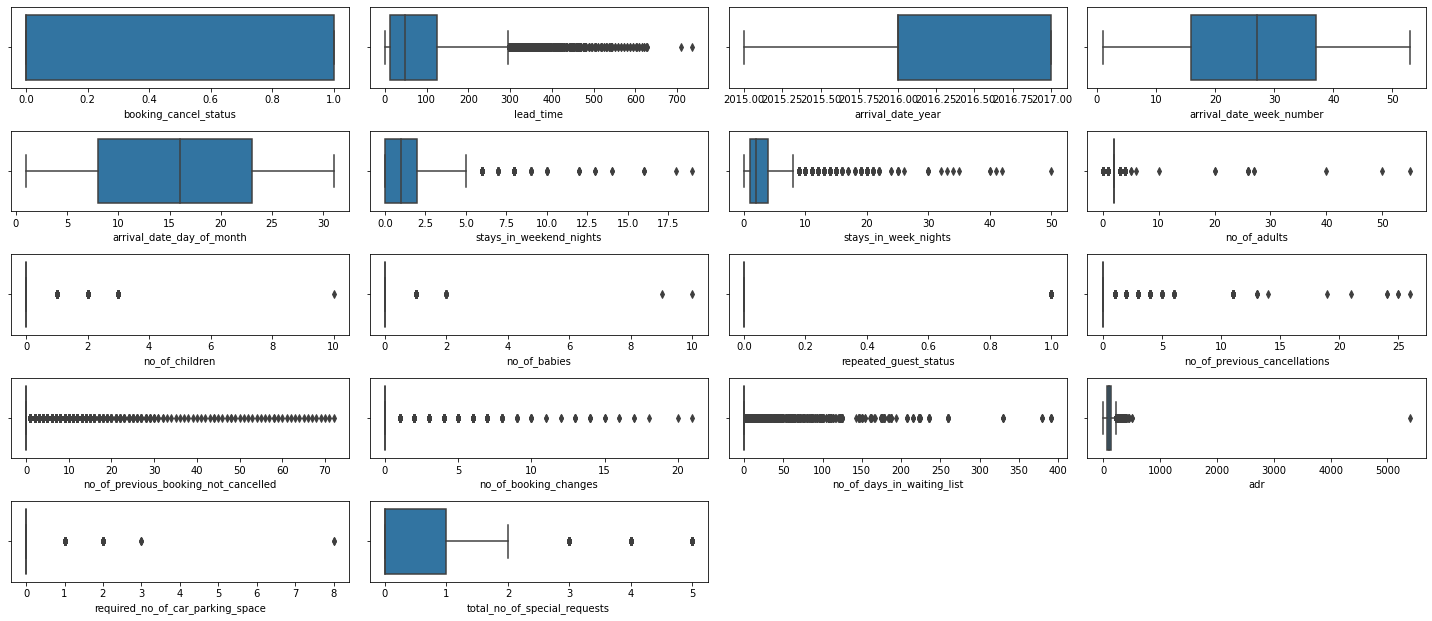

In [26]:
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
x = 1 

for column in df1.describe().columns:
    plt.subplot(6,4,x)
    sns.boxplot(df1[column])
    x+=1
    
plt.tight_layout()

--> There are many outliers in our dataset

--> There is negative amount of ADR


--> We will drop the Adr outlier because there is only one value which is random, so we will not consider it into our analysis

In [27]:
# Treating ADR outlier
df1[df1['adr'] <0]


,hotel,booking_cancel_status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,...,no_of_booking_changes,deposit_type,no_of_days_in_waiting_list,customer_type,adr,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date,arrival_month_year
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,2,No Deposit,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15,2017-03-01


In [28]:
# Dropping the ADR values which are less than 0
df1 = df1.drop(df1[df1.adr < 0].index)
df1[df1['adr'] < 0]


,hotel,booking_cancel_status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,...,no_of_booking_changes,deposit_type,no_of_days_in_waiting_list,customer_type,adr,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date,arrival_month_year


In [29]:
# Dropping the ADR value more than 5000
df1 = df1.drop(df1[df1.adr > 5000].index)
df1[df1['adr']> 5000]

,hotel,booking_cancel_status,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,...,no_of_booking_changes,deposit_type,no_of_days_in_waiting_list,customer_type,adr,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date,arrival_month_year


7. Merging the columns for better insights

In [30]:
#  Creating a column of total_no_in_group
df1['total_no_in_group'] =df1['no_of_adults'] + df1['no_of_children'] +df1['no_of_babies']

In [31]:
# Creating a column of total_no_of_stays
df1['total_no_of_stays']=df1['stays_in_week_nights'] + df1['stays_in_weekend_nights']

In [32]:
# checking our dataset
df1.iloc[:15,4:] 

,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,no_of_adults,no_of_children,no_of_babies,meal_type,country,...,no_of_days_in_waiting_list,customer_type,adr,required_no_of_car_parking_space,total_no_of_special_requests,reservation_status,reservation_status_date,arrival_month_year,total_no_in_group,total_no_of_stays
0,July,27,1,0,0,2,0,0,BB,PRT,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2,0
1,July,27,1,0,0,2,0,0,BB,PRT,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,2,0
2,July,27,1,0,1,1,0,0,BB,GBR,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,1
3,July,27,1,0,1,1,0,0,BB,GBR,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,1
4,July,27,1,0,2,2,0,0,BB,GBR,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2,2
6,July,27,1,0,2,2,0,0,BB,PRT,...,0,Transient,107.00,0,0,Check-Out,2015-07-03,2015-07-01,2,2
7,July,27,1,0,2,2,0,0,FB,PRT,...,0,Transient,103.00,0,1,Check-Out,2015-07-03,2015-07-01,2,2
8,July,27,1,0,3,2,0,0,BB,PRT,...,0,Transient,82.00,0,1,Canceled,2015-05-06,2015-07-01,2,3
9,July,27,1,0,3,2,0,0,HB,PRT,...,0,Transient,105.50,0,0,Canceled,2015-04-22,2015-07-01,2,3
10,July,27,1,0,4,2,0,0,BB,PRT,...,0,Transient,123.00,0,0,Canceled,2015-06-23,2015-07-01,2,4


Exploratory Data analysis and Visualization

showing the correlation between columns

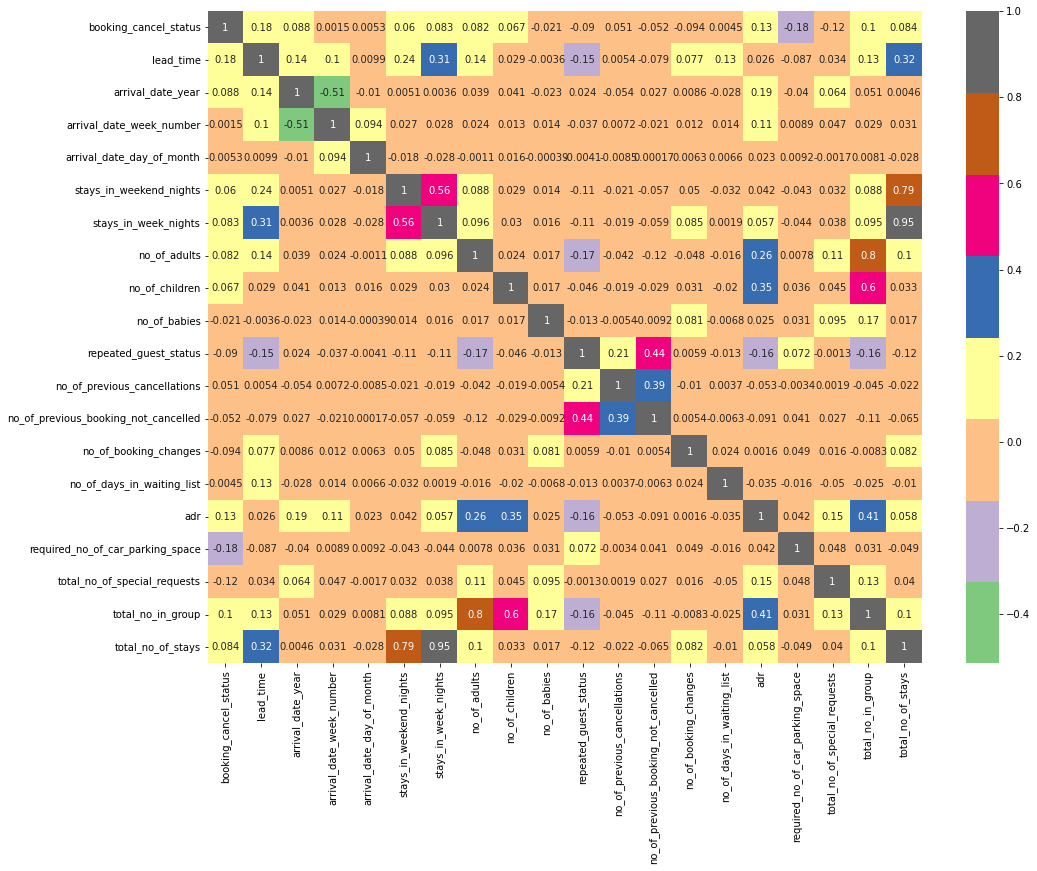

In [33]:
#correlation
plt.figure(figsize=(16,12))
sns.heatmap(df1.corr(),annot=True,cmap='Accent')

#Analysis on the Basis of columns
1. Analysis on the basis of hotel
2. Analysis on the basis of booking and cancellation
3. Analysis on the basis of adr(average daily rate)
4. Analysis on the basis of distribution channel
5. Analysis on the basis of deposit type
6. Analysis on the basis of meal type
7. Analysis on the basis of room type
8. Analysis on the basis of country

#1. Analysis on the basis of Hotel

1.   Which hotel type prefered the most?
2.   which hotel has a higher booking cancellation rate?
3.   How long do people prefer to stay in both hotels?
4.   Which hotel require more car parking spaces?
5.   Which hotel generates the most revenue?
6.   Which are the busiest months for hotel?
7.   Which hotel has the higher lead time?
8.   Was a hotel likely top recieve a disproportionately high number of special requests?

                        1. Which hotel type is preferred the most?



In [34]:
# Unique values in the hotel column
df1['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

Data visualization through pie chart

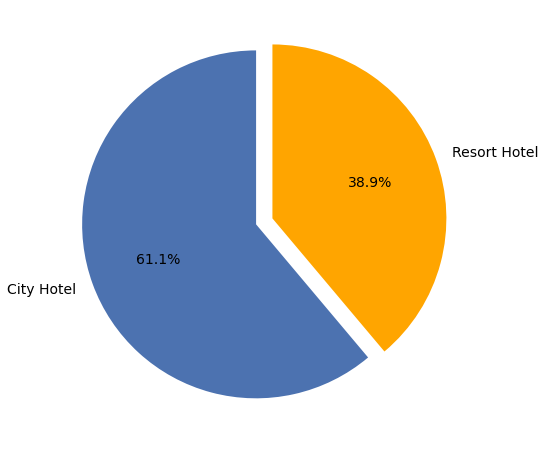

In [35]:
# Enlarging the pie chart
plt.rcParams['figure.figsize'] = 8,8

# Indexing labels. tolist() will convert the index to list for easy manipulation
labels = df1['hotel'].value_counts().index.tolist()

# Convert value counts to list
sizes = df1['hotel'].value_counts().tolist()

# As the name suggest, explode will determine how much each section is separated from each other 
explode = (0, 0.1)

# Determine colour of pie chart
colors = ['#4c72b0', 'orange']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize': 14})
plt.show()

--> 61% of people prefer city Hotels 
and 39% of people prefer resort hotels

--> It might be possible because of the pricing factor and the location of the hotel 

--> We can also assume that the city hotel is more popular than resort hotel


           Q2. Which hotel has a higher booking cancellation?

Text(0.5, 1.0, 'Chart of Booking Cancellations')

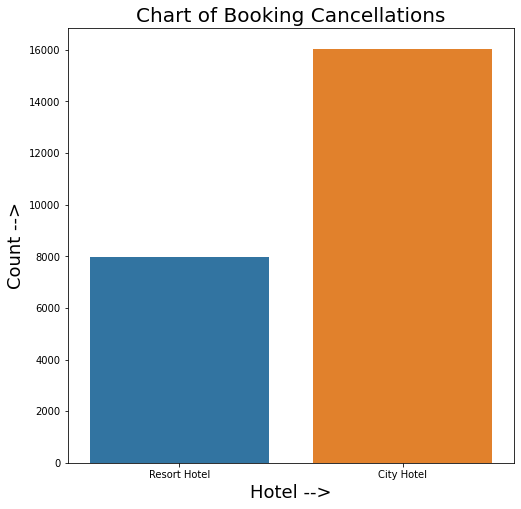

In [36]:
# Count plot of hotels
h_cancel=df1[df1['booking_cancel_status']==1]
sns.countplot(h_cancel['hotel'])
plt.xlabel('Hotel -->',fontsize=18)
plt.ylabel('Count -->',fontsize=18)
plt.title('Chart of Booking Cancellations',fontsize=20)

--> Booking cancellations are more in city hotels as compared to the resort hotels

           Q3. How long do people prefer to stay in both hotels?

Text(0.5, 1.0, 'Chart of duration of stay')

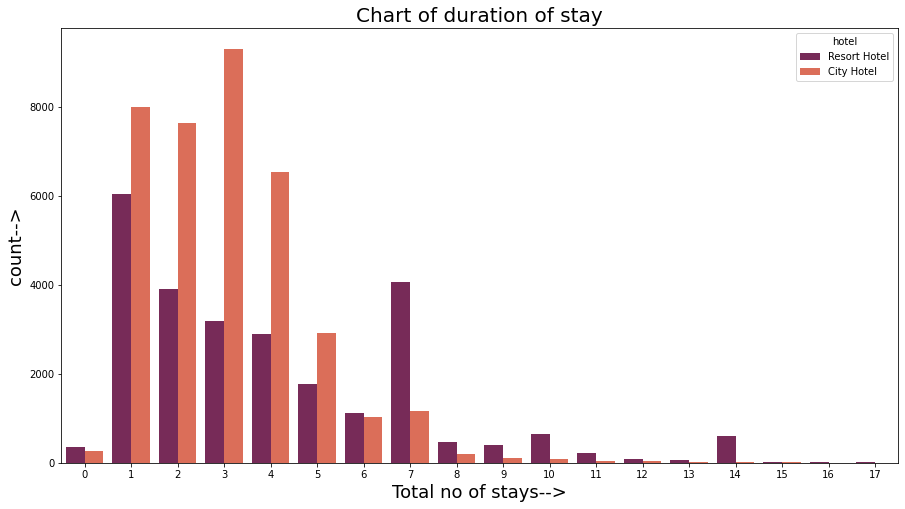

In [37]:
# Count plot of total no of stays
not_cancel=df1[df1['booking_cancel_status']==0]
not_cancel=not_cancel[not_cancel['total_no_of_stays'] < 18]
plt.figure(figsize = (15,8))
sns.countplot(x=not_cancel['total_no_of_stays'],hue=not_cancel['hotel'],palette='rocket')
plt.xlabel('Total no of stays-->',fontsize=18)
plt.ylabel('count-->',fontsize=18)
plt.title('Chart of duration of stay',fontsize=20)

-->  On the basis of above chart,people prefer City Hotel for **shorter duration** like 3-4 days of stay and Resort Hotel for **longer duration** like 7-10 days or even for 14 days

       Q4. Which hotel require more car parking spaces?

Text(0.5, 1.0, 'Required no of car parking spaces hotel wise trend')

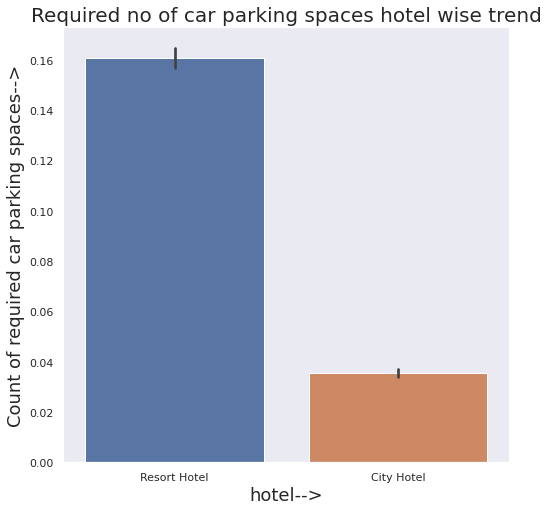

In [73]:
# bar graph on required no of car parking hotel wise trend
plt.figure(figsize=(8,8))
sns.barplot(x=df['hotel'],y=df1['required_no_of_car_parking_space'])
plt.xlabel('hotel-->',fontsize=18)
plt.ylabel('Count of required car parking spaces-->',fontsize=18)
plt.title('Required no of car parking spaces hotel wise trend',fontsize=20)

--> According above chart, **Resort Hotels** require more car parking space than City Hotel.

Text(0.5, 1.0, 'Required no of car parking spaces year wise trend')

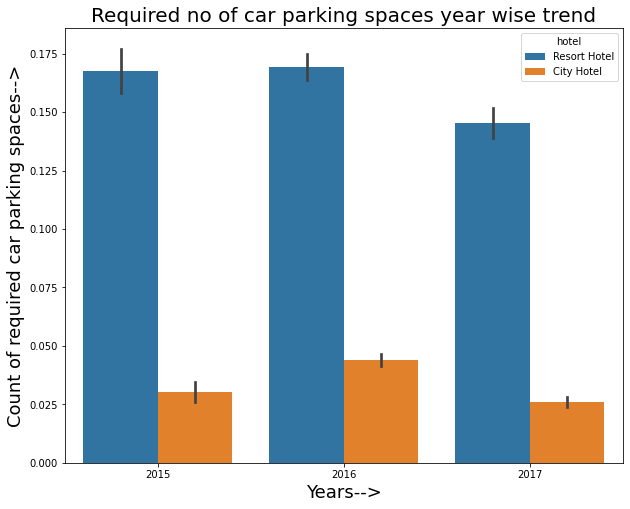

In [39]:
# bar graph on required no of car parking spaces year wise trend
plt.figure(figsize=(10,8))
sns.barplot(x=df1['arrival_date_year'],y=df1['required_no_of_car_parking_space'],hue=df1['hotel'])
plt.xlabel('Years-->',fontsize=18)
plt.ylabel('Count of required car parking spaces-->',fontsize=18)
plt.title('Required no of car parking spaces year wise trend',fontsize=20)

--> According above chart, every year **Resort Hotels** require more car parking space than City Hotel.

               5.   Which hotel generates the most revenue?

Text(0.5, 1.0, 'chart of ADR generated by each hotel')

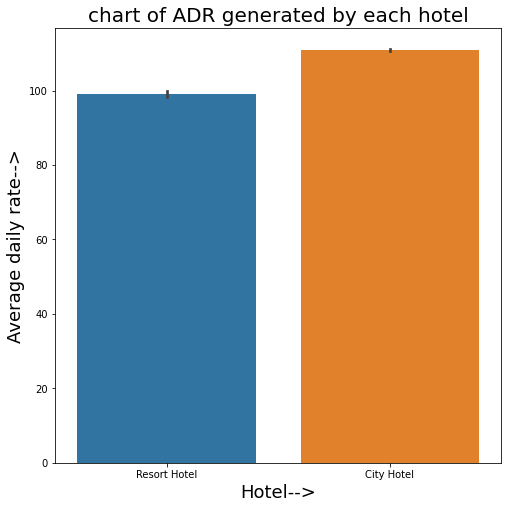

In [40]:
# Bar graph between hotel and average daily rate
sns.barplot(x=df1['hotel'],y=df1['adr'])
plt.xlabel('Hotel-->',fontsize=18)
plt.ylabel('Average daily rate-->',fontsize=18)
plt.title('chart of ADR generated by each hotel',fontsize=20)

--> According to above bar charts, we can see **City Hotel** generates more revenue as compared to the resort hotels

       Q6. Which are the busiest months for hotel?

Text(0.5, 1.0, 'chart analysing busiest month')

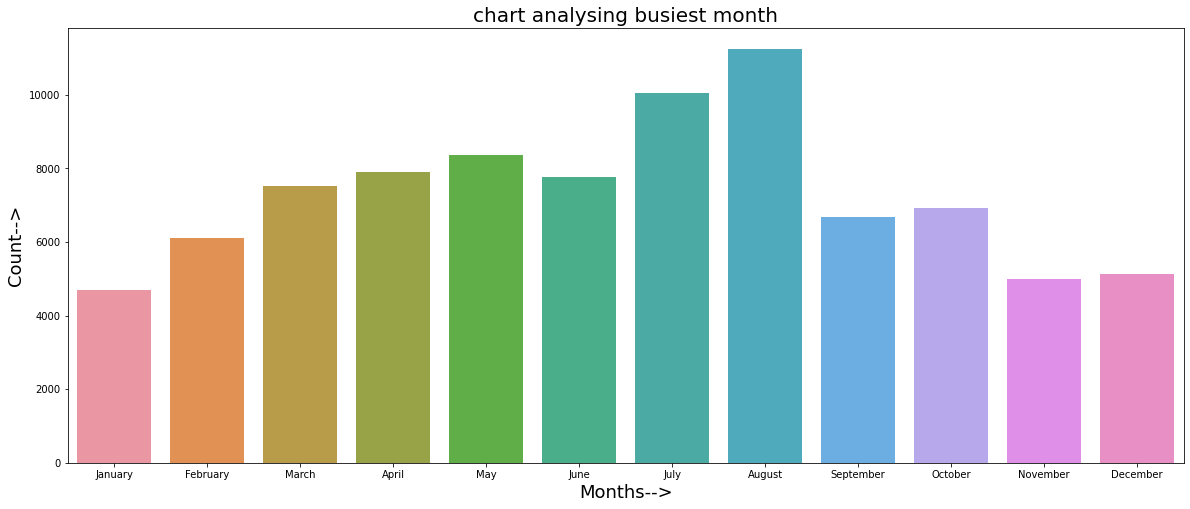

In [41]:
busiest_month=df1['arrival_date_month'].value_counts().sort_values(ascending=False)
busy_month=pd.DataFrame(busiest_month).reset_index()
busy_month.columns=['month','count']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
busy_month['month'] = pd.Categorical(busy_month['month'], categories = months, ordered=True)
busy_month.sort_values(by='month').reset_index(drop=True)
plt.figure(figsize=(20,8))
sns.barplot(x=busy_month['month'],y=busy_month['count'])
plt.xlabel('Months-->',fontsize=18)
plt.ylabel('Count-->',fontsize=18)
plt.title('chart analysing busiest month',fontsize=20)

--> According to chart, Most busiest months for hotels are  **July and August**

          Q7. Which hotel has the higher lead time?

Text(0.5, 1.0, 'Average lead time for hotels')

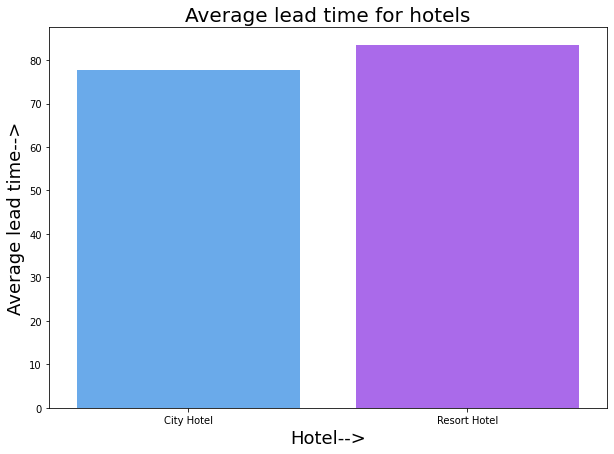

In [42]:
avg_lead= df1.groupby(by='hotel').agg({'lead_time':'mean'}).reset_index()
avg_lead
plt.figure(figsize=(10,7))
sns.barplot(x=avg_lead['hotel'],y=avg_lead['lead_time'],palette='cool')
plt.xlabel('Hotel-->',fontsize=18)
plt.ylabel('Average lead time-->',fontsize=18)
plt.title('Average lead time for hotels',fontsize=20)

--> According to above chart **Resort Hotel** has highest average lead time.

         Q8. Was a hotel likely to recieve a disproportionately high number of special requests?

In [43]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

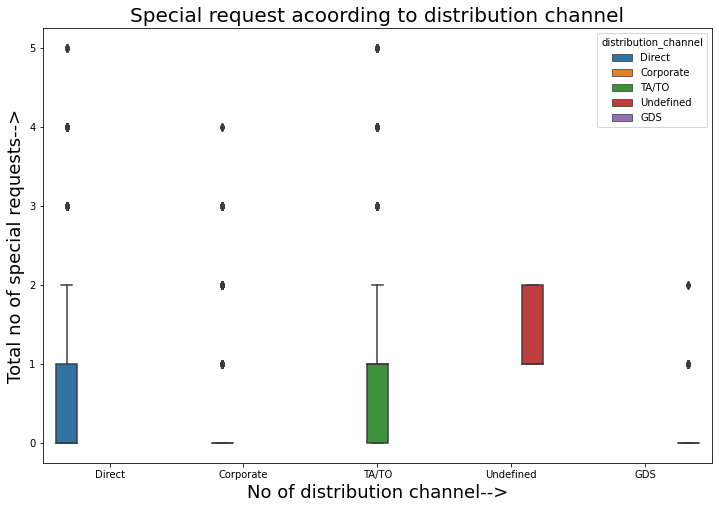

In [44]:
#Special request acoording to distribution channel
sns.boxplot(x="distribution_channel", y="total_no_of_special_requests",hue='distribution_channel',data= df1)
plt.xlabel('No of distribution channel-->',fontsize=18)
plt.ylabel('Total no of special requests-->',fontsize=18)
plt.title("Special request acoording to distribution channel",fontsize=20)
fig = plt.gcf()
fig.set_size_inches(12,8)

--> Almost every market segment has a special request.

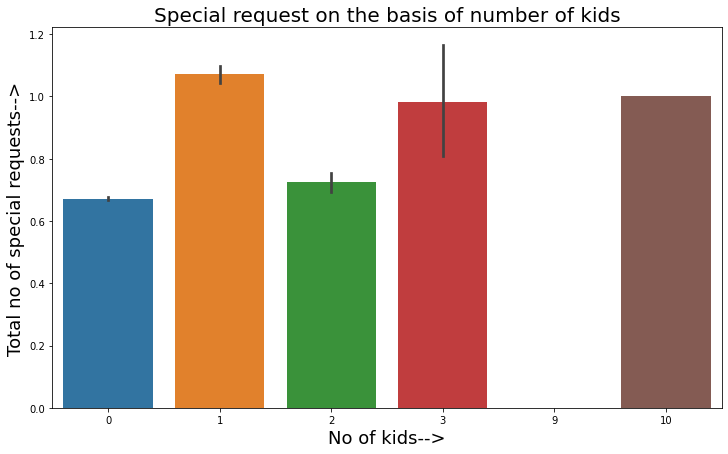

In [45]:
#Special requests on the basis of number of kids.
df1['kids'] = df1['no_of_children']+df1['no_of_babies']
plt.figure(figsize=(12,7))
sns.barplot(x="kids", y="total_no_of_special_requests",data= df1)
plt.xlabel('No of kids-->',fontsize=18)
plt.ylabel('Total no of special requests-->',fontsize=18)
plt.title("Special request on the basis of number of kids",fontsize=20)
fig = plt.gcf()

--> The number of sepcial requests are almost equal.

--> There are more chances of special requests in case of 1 kid.

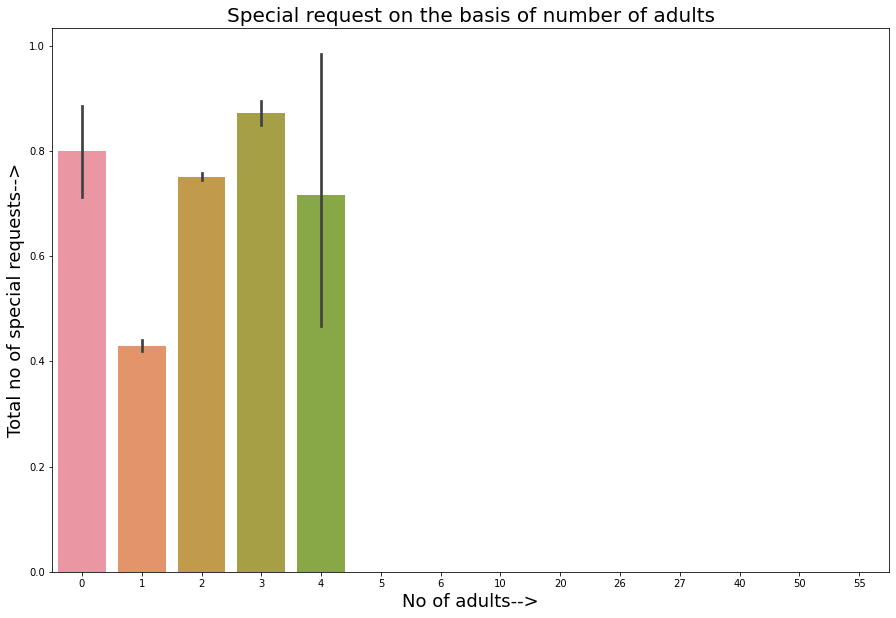

In [46]:
#Special request on the basis of number of adults.
sns.barplot(x="no_of_adults", y="total_no_of_special_requests",data= df1)
plt.xlabel('No of adults-->',fontsize=18)
plt.ylabel('Total no of special requests-->',fontsize=18)
plt.title("Special request on the basis of number of adults",fontsize=20)
fig = plt.gcf()
fig.set_size_inches(15,10)

--> The hotel will recieve the special requests when the number of adults are 3

#2.Analysis on the basis of booking and cancellation


1.   Visualizing monthly bookings and monthly cancellations.
2.   Relationship between lead time and cancellation.
3.   Which type of customers make the most bookings?
4.   Which type of customers make the special requests?
5.   Which customer type has the highest cancellation of bookings?
6.   When is the best time of year to book a hotel room?

    1.   Visualizing monthly bookings and monthly cancellations.

In [47]:
# taking different values of months count into account.
df_copy = df.copy()
df_copy['no_of_bookings']= 1
df_copy.loc[(df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August'),'no_of_bookings']/=3
df_copy.loc[~((df_copy.arrival_date_month== 'July')| (df_copy.arrival_date_month== 'August')),'no_of_bookings']/=2
df_copy.sample(100)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,no_of_bookings
50435,City Hotel,0,118,2016,April,18,30,2,3,2,...,9.0,NaN,0,Transient-Party,97.75,0,1,Check-Out,2016-05-05,0.500000
74026,City Hotel,1,300,2015,August,33,13,0,2,2,...,1.0,NaN,0,Contract,62.00,0,0,Canceled,2015-01-01,0.333333
42313,City Hotel,0,28,2015,September,36,4,2,2,1,...,9.0,NaN,0,Contract,90.25,0,1,Check-Out,2015-09-08,0.500000
33203,Resort Hotel,0,94,2017,February,7,13,1,3,1,...,152.0,NaN,0,Transient-Party,44.00,0,0,Check-Out,2017-02-17,0.500000
70882,City Hotel,1,149,2017,June,25,24,0,1,2,...,NaN,NaN,0,Transient-Party,130.00,0,0,Canceled,2017-02-06,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89762,City Hotel,0,12,2016,May,22,25,0,1,2,...,42.0,NaN,0,Transient,79.20,0,0,Check-Out,2016-05-26,0.500000
106574,City Hotel,0,45,2017,February,8,24,1,2,2,...,9.0,NaN,0,Transient,152.10,0,1,Check-Out,2017-02-27,0.500000
100413,City Hotel,0,100,2016,October,44,24,1,3,2,...,9.0,NaN,0,Transient,221.18,0,0,Check-Out,2016-10-28,0.500000
40810,City Hotel,1,125,2015,August,32,7,2,2,2,...,9.0,NaN,0,Transient,76.50,0,1,Canceled,2015-04-06,0.333333


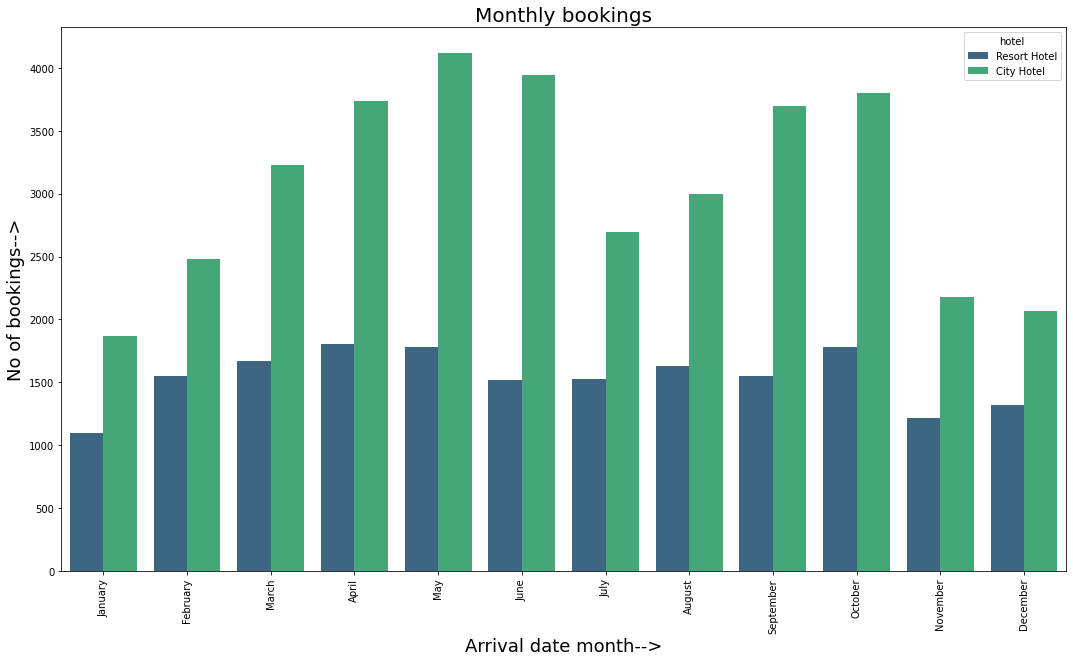

In [48]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_copy['arrival_date_month'] = pd.Categorical(df_copy['arrival_date_month'], categories = months, ordered=True)
plt.figure(figsize=(18,10))
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df_copy['hotel'], estimator= sum, data= df_copy,palette='viridis')
plt.xlabel('Arrival date month-->',fontsize=18)
plt.ylabel('No of bookings-->',fontsize=18)
plt.title("Monthly bookings",fontsize=20)
plt.xticks(rotation = 90)
plt.show()

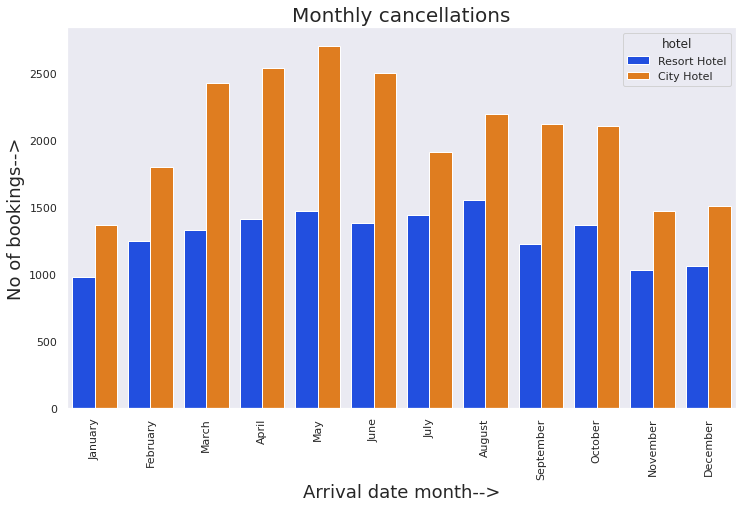

In [49]:
df2 = df1.copy()
df2['no_of_bookings']= 1
df2.loc[(df2.arrival_date_month== 'July')| (df2.arrival_date_month== 'August'),'no_of_bookings']/=3
df2.loc[~((df2.arrival_date_month== 'July')| (df2.arrival_date_month== 'August')),'no_of_bookings']/=2
df2.sample(100)
b= df2[df2.booking_cancel_status == 1]
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df2['arrival_date_month'] = pd.Categorical(df1['arrival_date_month'], categories = months, ordered=True)
sns.set(style="dark")
plt.figure(figsize=(12,7))
plt.title("Monthly cancellations",fontsize=20)
sns.barplot(x= 'arrival_date_month', y= 'no_of_bookings', hue= df2['hotel'], estimator= sum, data= df2,palette='bright')
plt.xlabel('Arrival date month-->',fontsize=18)
plt.ylabel('No of bookings-->',fontsize=18)
plt.xticks(rotation = 90)
plt.show()

--> In City hotels bookings and cancellations are high during the month of  May  
-->In case of resort hotels there is not much variations in bookings and cancellations. Bookings and cancellations are highest during the months of April, May and October.

                2. Relationship between lead time and cancellations

Text(0.5, 1.0, 'Arriving year, Leadtime and Cancelations')

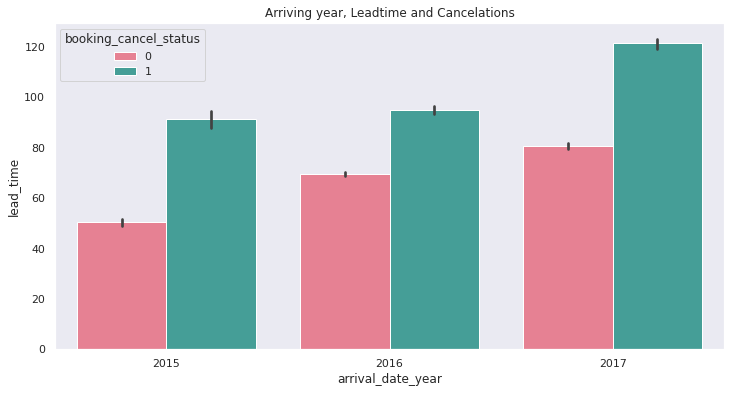

In [50]:
plt.figure(figsize=(12,6))
sns.barplot(x='arrival_date_year', y='lead_time',hue='booking_cancel_status', data= df1, palette='husl')
plt.title('Arriving year, Leadtime and Cancelations')

Text(0, 0.5, 'Lead time-->')

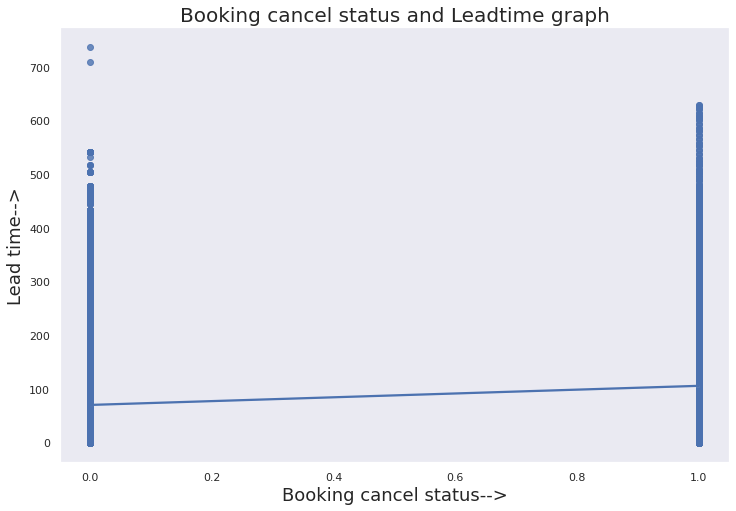

In [51]:
#correlation
plt.figure(figsize=(12,8))
sns.regplot(x=df1['booking_cancel_status'],y=df1['lead_time'])
plt.title('Booking cancel status and Leadtime graph',fontsize=20)
plt.xlabel('Booking cancel status-->',fontsize=18)
plt.ylabel('Lead time-->',fontsize=18)

-->  According to the abouve chart, there is a possitive correlation between lead time and booking cancellations.
--> Higher lead lead time leads to higher chances of booking cancellations and vice versa

    Q3. Which type of customers make the most bookings?

Text(0, 0.5, 'Count-->')

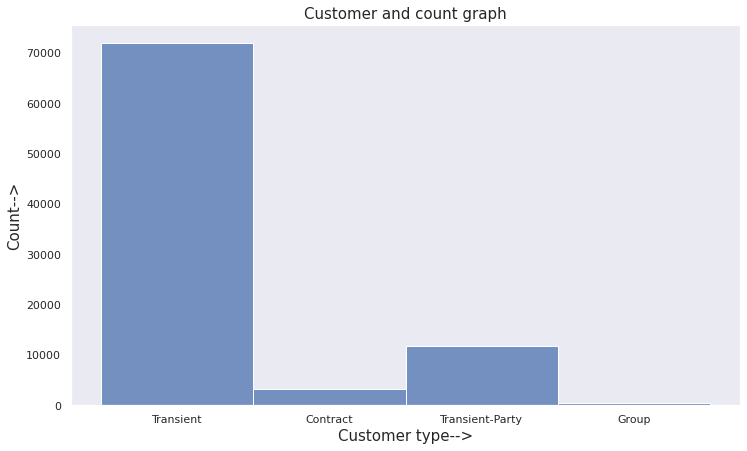

In [52]:
# histogram plot of customer's count
plt.figure(figsize=(12,7))
sns.histplot(df1['customer_type'])
plt.title('Customer and count graph',fontsize=15)
plt.xlabel('Customer type-->',fontsize=15)
plt.ylabel('Count-->',fontsize=15)

-->  According to histogram chart Transient(when the booking is not part of a group or contract, and is not associated to other transient booking) customers make most bookings.

      Q4. Which type of customers make the special requests?

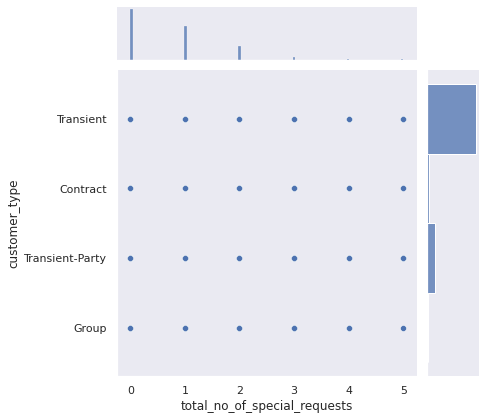

In [53]:
# joint plot of customer type and total no of special requests
sns.jointplot(x=df1['total_no_of_special_requests'],y=df1['customer_type'])

-->  According to joint chart, Most no of special requests comes from **Transient customers**.

    Q5. Which customer type  has the highest cancellation of bookings?

Text(0.5, 1.0, 'Booking cancelled by groups on customer type')

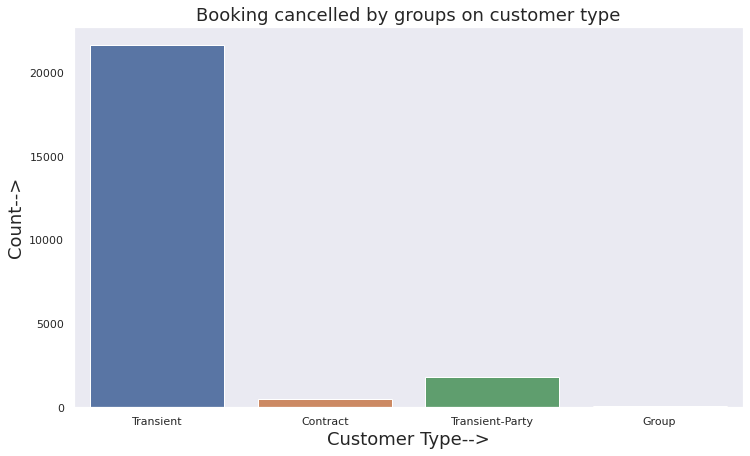

In [54]:
# Booking cancelled by groups on customer type
dist_cancel=df1[df1['booking_cancel_status']==1]
plt.figure(figsize=(12,7))
sns.countplot(dist_cancel['customer_type'])
plt.xlabel('Customer Type-->',fontsize=18)
plt.ylabel('Count-->',fontsize=18)
plt.title('Booking cancelled by groups on customer type',fontsize=18)

--> According to chart, Transient customer has the highest cancellation.

     Q6. When is the best time of a year to book a hotel room ?

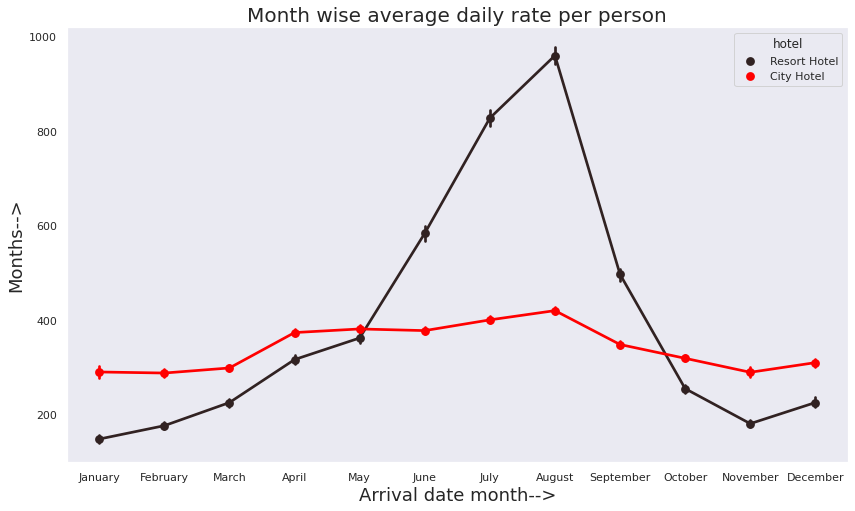

In [55]:
#Calculating Average Daily Rate Per Person 
plt.figure(figsize = (14,8))

df1['adr_pp'] = df1['adr'] / (df1['no_of_adults'] + df1['no_of_children']) 
actual_guests = df1.loc[df1["booking_cancel_status"] != '0']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
actual_guests['arrival_date_month'] = pd.Categorical(actual_guests['arrival_date_month'], categories = months, ordered=True)
sns.pointplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel',color='red')
plt.xlabel('Arrival date month-->',fontsize=18)
plt.ylabel('Months-->',fontsize=18)
plt.title('Month wise average daily rate per person',fontsize=20)
plt.show()

-->  According to point chart, Minimum adr per person is lowest in **January for Resort Hotel and January, February and November for City hotel**, these months are best deal for hotel booking.

#3. Analysis on the basis of adr(average daily rate).


1.   Relationship between ADR and the total number of stays.
2.   Which hotel generates the highest revenue i.e. Average Daily Rate Per Person?


    1.Relationship between ADR and the total number of stays 

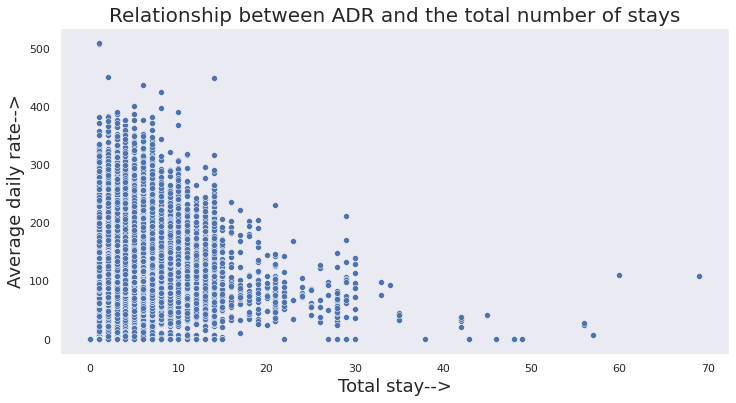

In [56]:
df1['total_stay'] = df1['stays_in_weekend_nights']+df1['stays_in_week_nights']
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df1)
plt.xlabel('Total stay-->',fontsize=18)
plt.ylabel('Average daily rate-->',fontsize=18)
plt.title('Relationship between ADR and the total number of stays',fontsize=20)
plt.show()

--> There is a negative correlation between the TOtal stay and the AdR, which means as the length of total_stay increases the adr decreases.


    Q2. Which hotel generates the highest revenue i.e. Average Daily Rate Per Person?

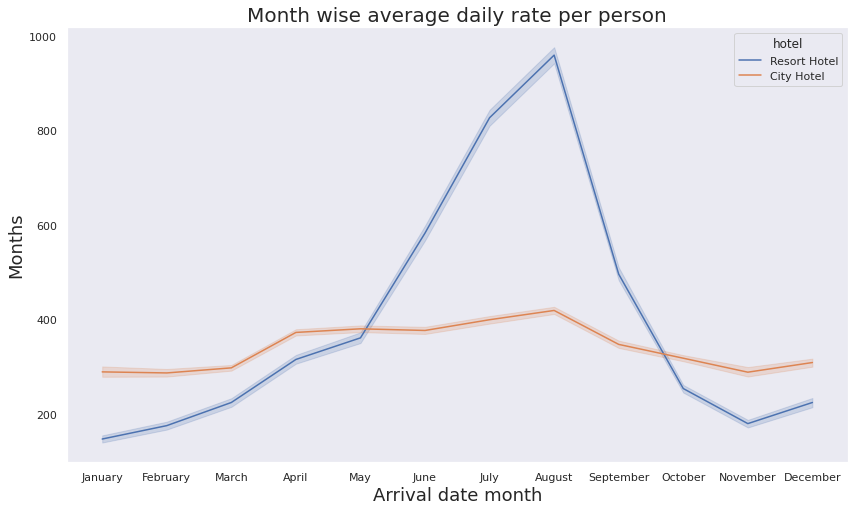

In [57]:
#Calculating Average Daily Rate Per Person 
plt.figure(figsize = (14,8))

df1['adr_pp'] = df1['adr'] / (df1['no_of_adults'] + df1['no_of_children']) 
actual_guests = df1.loc[df1["booking_cancel_status"] != '0']
actual_guests['price'] = actual_guests['adr'] * (actual_guests['stays_in_weekend_nights'] + actual_guests['stays_in_week_nights'])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
actual_guests['arrival_date_month'] = pd.Categorical(actual_guests['arrival_date_month'], categories = months, ordered=True)
sns.lineplot(data = actual_guests, x = 'arrival_date_month', y = 'price', hue = 'hotel')
plt.xlabel('Arrival date month',fontsize=18)
plt.ylabel('Months',fontsize=18)
plt.title('Month wise average daily rate per person',fontsize=20)
plt.show()

-->  It is clearly seen that Price of Resort hotel are much higher and Prices of city Hotel are more and less constant . Hence , we can conclude that ***Resort type hotel generates much more revenue*** than city hotel in busiest months i.e. **July and August**

#4. Analysis on the basis of distribution channel


1.   Which distribution channel is mostly used?
2.   Which distribution channel generates the most revenue for hotels?

    Q1.   Which distribution channel is mostly used?

In [58]:
df1['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

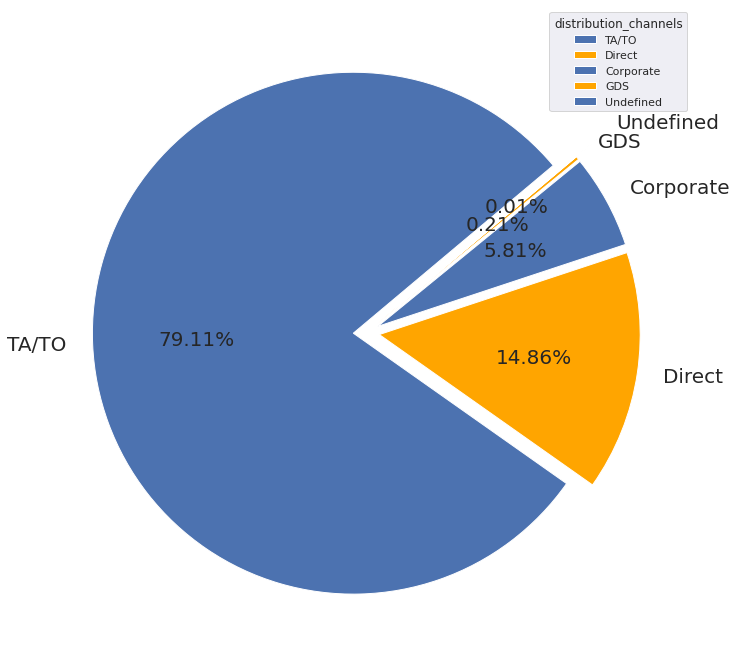

In [59]:
# Pie chart for popular distribution channel percentage wise
dist_vc=pd.DataFrame(df1['distribution_channel'].value_counts()).reset_index()
dist_vc['percentage']=(dist_vc['distribution_channel'])*100/dist_vc['distribution_channel'].sum()
dist_vc.columns=['distribution_channel','count','percentage']
plt.figure(figsize= (15,12))
plt.tight_layout()
sort_legend=False
palette_color=sns.color_palette('bright')
plt.pie(dist_vc['percentage'],labels=dist_vc['distribution_channel'],explode=[0.05,0.05,0.05,0.05,0.15],
        startangle=40,colors= colors,textprops={'fontsize':20}, autopct='%0.2f%%')
plt.legend(title='distribution_channels')
plt.show()

-->According to the above pie chart 79.11% bookings are made by TA/TO(Travel agent/Travel operators), so we can say that TA/TO distribution channel is mostly use by groups.

    Q2. Which distribution channel generates the most revenue for hotels?

Text(0.5, 1.0, 'Graph between distribution channel and average daily rate(hotel wise)')

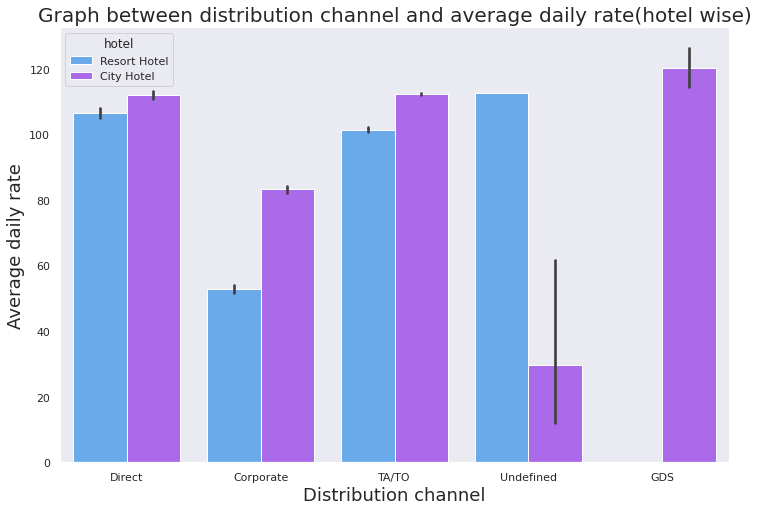

In [60]:
# Graph between distribution channel and average daily rate(hotel wise)
plt.figure(figsize=(12,8))
sns.barplot(x=df1['distribution_channel'],y=df1['adr'],hue=df1['hotel'],palette='cool')
plt.xlabel('Distribution channel',fontsize=18)
plt.ylabel('Average daily rate',fontsize=18)
plt.title('Graph between distribution channel and average daily rate(hotel wise)',fontsize=20)

According to chart, we can say that **GDS(Global Distribution System)** generates more revenue for **City Hotel** and **Undefined** for **Resort Hotel**

#5. Analysis on the basis of deposit type


1.   analyzing which deposit type is preferred most?

Text(0.5, 1.0, 'Graph between deposit type and count')

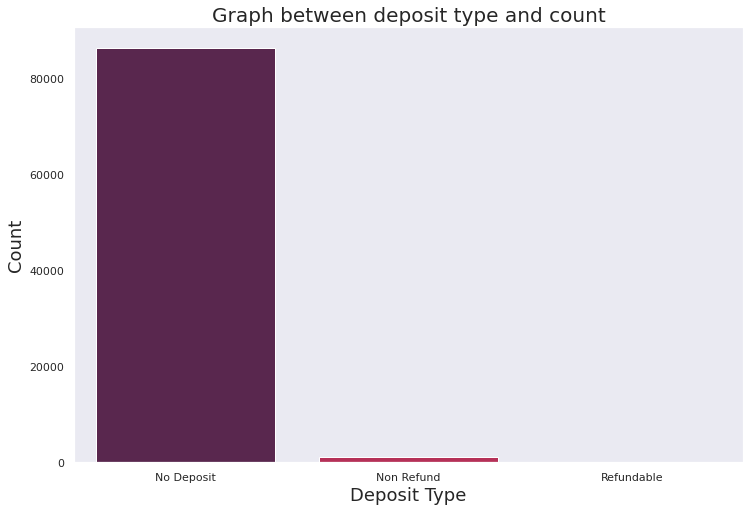

In [61]:
# Graph between deposit type and count
dep_df =pd.DataFrame(df1['deposit_type'].value_counts()).reset_index()
dep_df.columns=['deposit_type','count']
plt.figure(figsize=(12,8))
sns.barplot(x=dep_df['deposit_type'],y=dep_df['count'],palette='rocket',units=True)
plt.xlabel('Deposit Type',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Graph between deposit type and count',fontsize=20)

--> No deposit type of deposit is preffered the most by the people

#6. Analysis on the basis of meal type


1.   Which type of meal is most and least prefered by the customers?

Text(0.5, 1.0, 'Count of meal type bar graph')

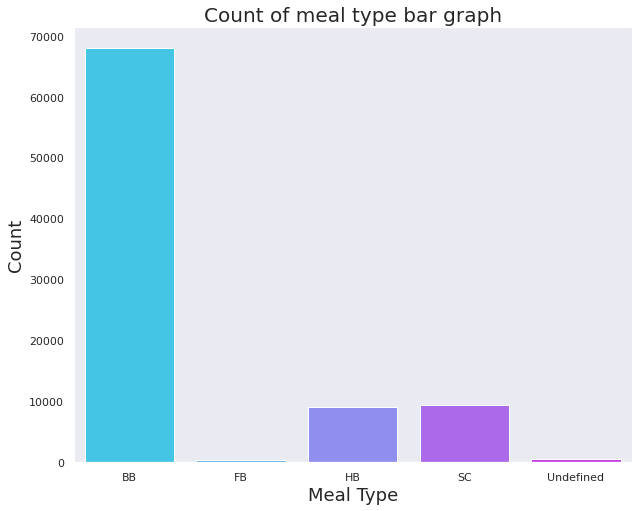

In [62]:
# Count of meal type bar graph
plt.figure(figsize=(10,8))
sns.countplot(df1['meal_type'],palette='cool')
plt.xlabel('Meal Type',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Count of meal type bar graph',fontsize=20)

--> Most preffered meal type is **BB(Bed and Breakfast)** among guests.

#7. Analysis on the basis of customer type.

1. Analyzing customer retention on customer type.

In [63]:
only_repeated_cust = df1[df1['repeated_guest_status']==1]

In [64]:
cust_retention = only_repeated_cust.groupby(['hotel','customer_type'])['repeated_guest_status'].count().unstack()

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

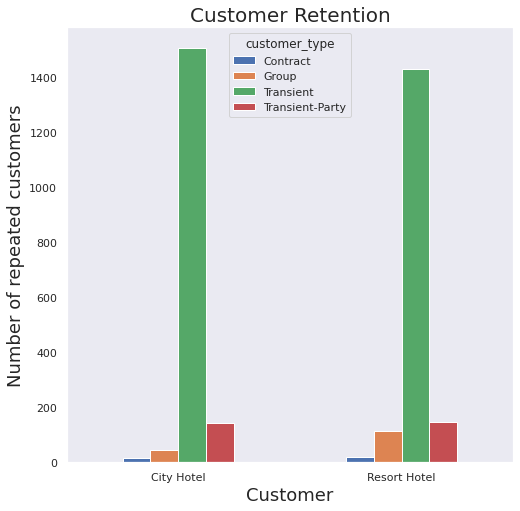

In [65]:
plt.figure(figsize=(10,5))
cust_retention.plot.bar()
plt.title('Customer Retention',fontsize=20)
plt.ylabel('Number of repeated customers',fontsize=18)
plt.xlabel('Customer',fontsize=18)
plt.xticks(rotation = 0)

According to Customer Retention Graph, Transient Customer is more loyal in both hotels but City Hotel's Transient Customers are more loyal compared to Resort Hotel's Transient Customers.

#8. Analysis on the basis of room type


1.   which room type is in most demand and which room type generates the highest average daily rate?

In [66]:
df1['reserved_room_type'].value_counts()

A    56550
D    17398
E     6049
F     2823
G     2052
B      999
C      915
H      596
L        6
P        6
Name: reserved_room_type, dtype: int64

Text(0.5, 1.0, 'Histogram showing the counts of different assigned room type')

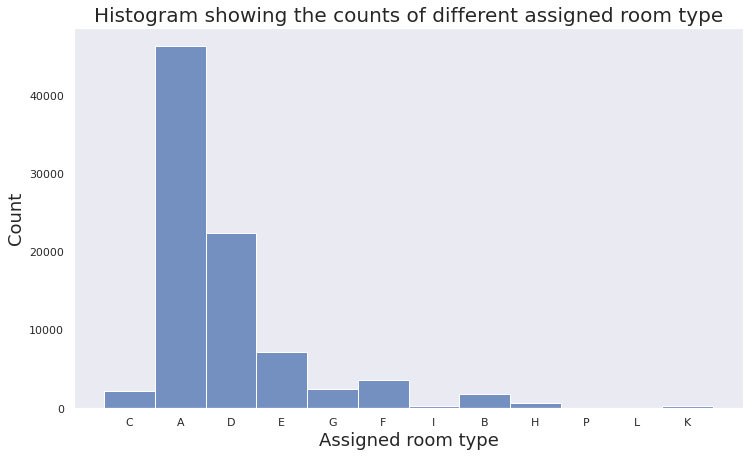

In [67]:
# Histogram graph for counts of different assigned room type
plt.figure(figsize=(12,7))
sns.histplot(df1['assigned_room_type'])
plt.xlabel('Assigned room type',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.title('Histogram showing the counts of different assigned room type',fontsize=20)

Text(0.5, 1.0, 'Bar graph for Room Type and average adr ')

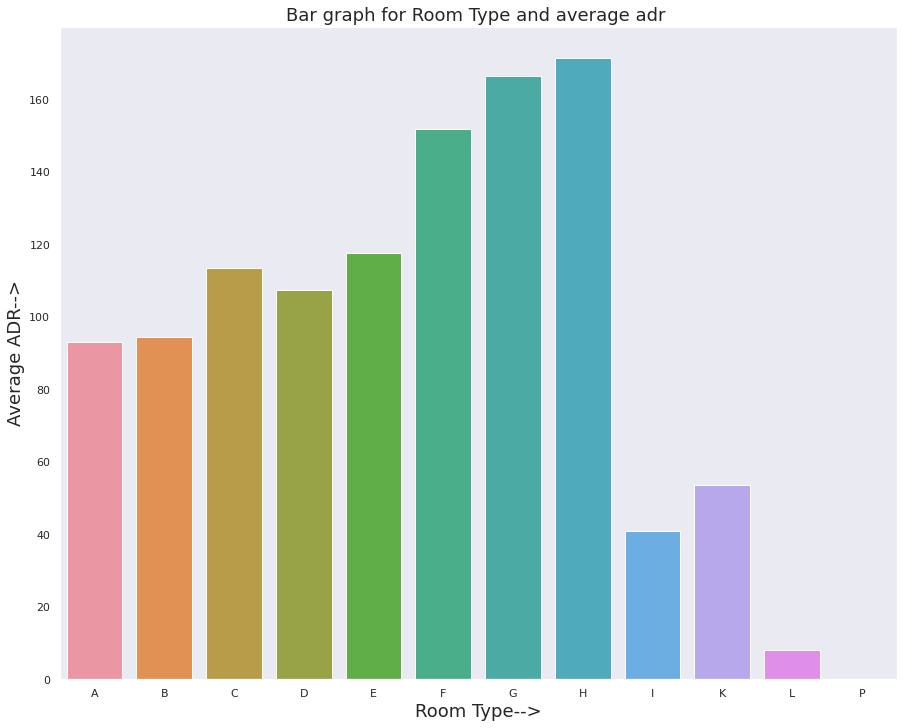

In [68]:
# Bar graph for Room Type and average adr
room_adr=df.groupby('assigned_room_type').agg({'adr':'mean'}).reset_index()
plt.figure(figsize=(15,12))
sns.barplot(x=room_adr['assigned_room_type'].sort_values(ascending=True),y=room_adr['adr'])
plt.xlabel('Room Type-->',fontsize=18)
plt.ylabel('Average ADR-->',fontsize=18)
plt.title('Bar graph for Room Type and average adr ',fontsize=18)

 --> According to above histogram chart most demanding room is** A (Room with discount available)** type but according to above bar chart **H (Complimentary use of health facilities)** room type is generates greatest ADR. 

#9. Analysis on the basis of country


1.   Which country has the greatest number of guests?

In [69]:
import folium
import plotly.express as px

In [70]:
# group by countries and taking sum of guests
country_guest =df1[['country','total_no_in_group']] 
country_guest= country_guest.groupby(by='country').agg({'total_no_in_group':'sum'}).reset_index()

In [71]:
# Visualizing countries on map and no of guests booking hotes in countries. 
basemap = folium.Map()
country_guest_map = px.choropleth(df, locations = country_guest['country'],color = country_guest['total_no_in_group'], hover_name = country_guest['country'],
                                 width=1200,height=600)
country_guest_map.show()

Text(0.5, 1.0, 'Relation between country and Total no of guests')

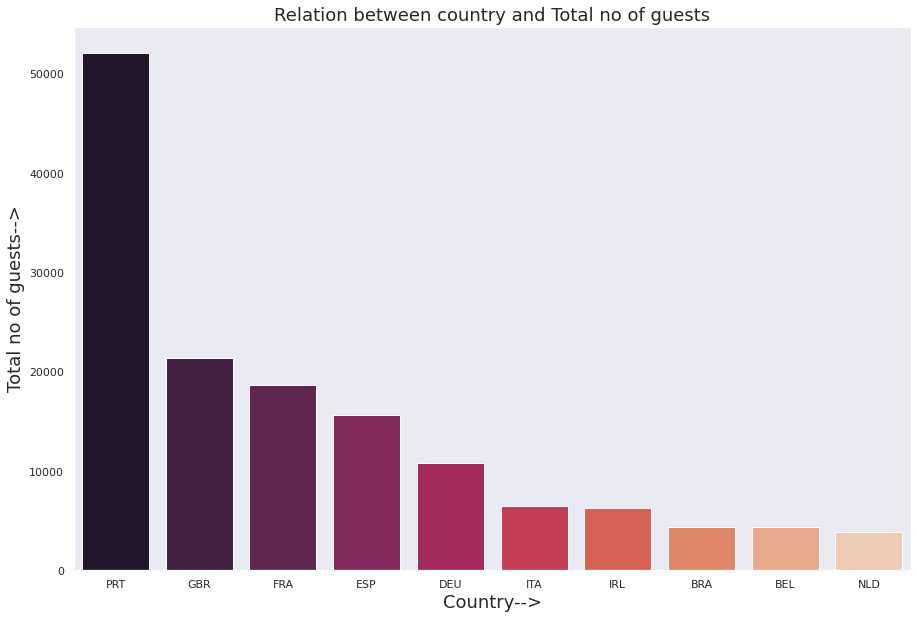

In [72]:
# Number of guests sorted in descending order country wise
country_guest1=country_guest.sort_values(by='total_no_in_group',ascending=False).head(10)
country_guest1
plt.figure(figsize=(15,10))
sns.barplot(x=country_guest1['country'],y=country_guest1['total_no_in_group'],palette='rocket')
plt.xlabel('Country-->',fontsize=18)
plt.ylabel('Total no of guests-->',fontsize=18)
plt.title('Relation between country and Total no of guests',fontsize=18)

 On the basis on map and chart we can say that most guests come from **Southern Europe** and **Portugal** has the greatest number of guests.